In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [41]:
weights = np.load('/fastio2/dasha/double_pulse/MCTree_NuTau.npy', mmap_mode='r')

In [119]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
flux = flux_at_100tev*((weights['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
# one weights has units of [GeV cm2 sr / Number of total simulated events]
weight = weights['weight']['OneWeight']*flux/(NFiles_all*weights['weight']["NEvents"]) # units of Hz per simulated events event
rate = np.sum(weight) # total rates in Hz
print("Tau = {0:.3f}".format(rate*livetime))

Tau = 531.682


In [187]:
print(weights[0])

[((12000, 4294967295, 1, 0), ([353879251,       294], 16, 277051.34, [2516.0503 ,  988.15466, 1947.4269 ], [0.8279483, 0.6104694], -2400.926, 3550.443), [([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0., [0., 0., 0.], [0., 0.], 0., 0.), ([0, 0], [0, 0], 0

In [188]:
tau_children = []
for e in weights['taus']['children_pdgs']:
    for t in e[0]:
        #print("AA",t)
        if not sum(t)==0:
            tau_children.append(t)
tau_children = np.array(tau_children)

In [189]:
count =0
for t in tau_children:
    if (13 in t) or (-13 in t):
        count = count +1
print(count/tau_children.shape[0])

0.16946657441345395


In [190]:
values, counts = np.unique(tau_children, return_counts=True, axis =0)
z = zip(values, counts)
for i in z:
    if i[1]> 100000:
        print(i[0],"Persent = {0:.2f}".format(i[1]/tau_children.shape[0]*100)) 

[-2000001006           0           0           0           0           0
           0           0           0           0] Persent = 48.73
[-2000001003 -2000001006           0           0           0           0
           0           0           0           0] Persent = 3.02
[-16  12 -11   0   0   0   0   0   0   0] Persent = 2.57
[-13   0   0   0   0   0   0   0   0   0] Persent = 5.90
[-11   0   0   0   0   0   0   0   0   0] Persent = 6.30
[11  0  0  0  0  0  0  0  0  0] Persent = 6.50
[13  0  0  0  0  0  0  0  0  0] Persent = 6.17


In [191]:
nu_children = []
nu_weights =[]
for e in weights:
    for n in e['nutaus']:
        if abs(n['parent_pdg'][0])== 15:
            #print(n[0],e['weight'])
            nu_children.append(n[0])
            nu_weights.append(e['weight'])
nu_children = np.array(nu_children)
nu_weights = np.array(nu_weights)

In [192]:
print(nu_children.shape, nu_weights.shape)

(411320,) (411320, 1)


In [193]:
nu_vars = []
for i in nu_children:
    nu_vars.append([i['energy'], (i['direction'][0])/np.pi*180-90])
nu_vars= np.array(nu_vars)

In [194]:
print(nu_vars.shape)

(411320, 2)


In [195]:
print(nu_weights['PrimaryNeutrinoEnergy'])

[[477189.12 ]
 [216522.67 ]
 [251279.05 ]
 ...
 [576037.   ]
 [ 18516.154]
 [ 75701.58 ]]


In [196]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
flux = flux_at_100tev*((nu_weights['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
# one weights has units of [GeV cm2 sr / Number of total simulated events]
weight = nu_weights['OneWeight']*flux/(NFiles_all*nu_weights["NEvents"]) # units of Hz per simulated events event
rate = np.sum(weight) # total rates in Hz
print("Tau = {0:.3f}".format(rate*livetime))

Tau = 10.942


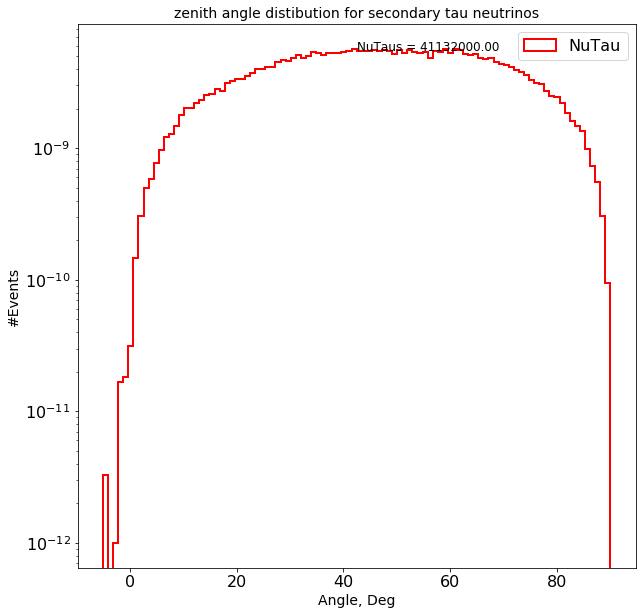

In [197]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("zenith angle distibution for secondary tau neutrinos", fontsize = 14)
ax.text(0.5,0.95,'NuTaus = {0:.2f}'.format(nu_vars.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Angle, Deg', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(nu_vars[:,1], weights = weight, bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  

plt.legend()
plt.show()

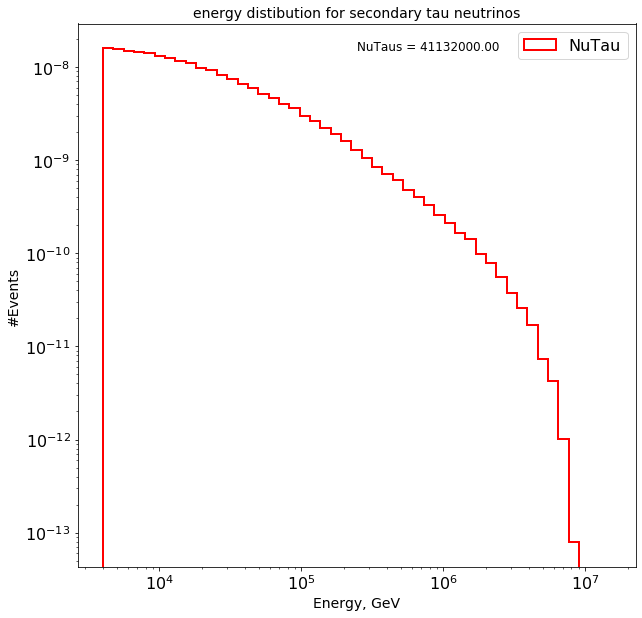

In [198]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title("energy distibution for secondary tau neutrinos", fontsize = 14)
ax.text(0.5,0.95,'NuTaus = {0:.2f}'.format(nu_vars.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(nu_vars[:,0], weights = weight, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  

plt.legend()
plt.show()

In [199]:
mask_30 = (nu_vars[:,1] <=30) 
mask_40 = (nu_vars[:,1] <=40) & (nu_vars[:,1] > 30)
mask_50 = (nu_vars[:,1] <=50) & (nu_vars[:,1] > 40)
mask_60 = (nu_vars[:,1] <=60) & (nu_vars[:,1] > 50)
mask_90 = (nu_vars[:,1] > 60)

In [200]:
nu_vars[:,1][mask_30]

array([23.81051323, 16.37316806, 26.08325868, ..., 27.54751463,
       15.24460907, 23.49413204])

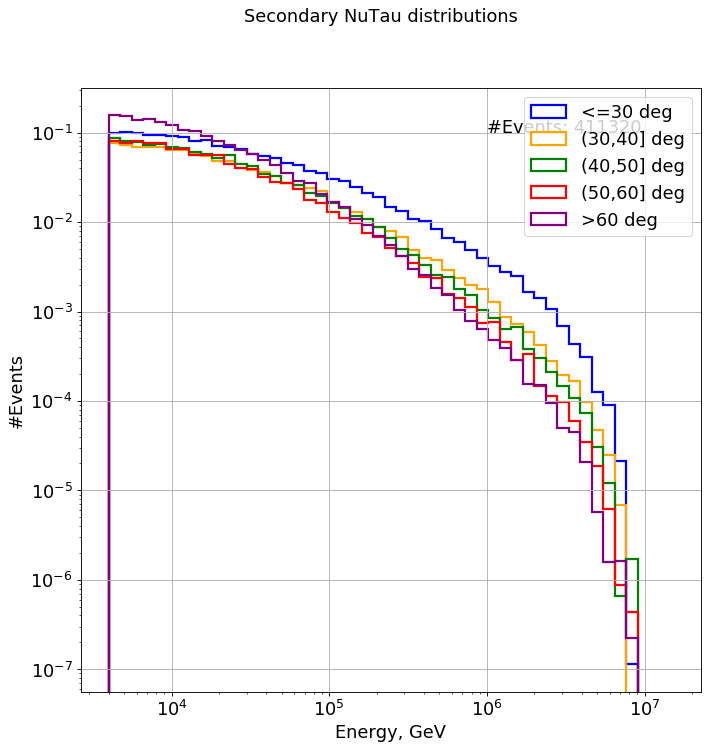

In [201]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Secondary NuTau distributions", fontsize = 16)

ax1.text(1000000,0.1,'#Events: {0:d}'.format(nu_vars.shape[0]), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_ylim([1, 10000])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events", fontsize = 16)                                                   
ax1.hist(nu_vars[:,0][mask_30],weights = weight[mask_30]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "<=30 deg")  
ax1.hist(nu_vars[:,0][mask_40],weights = weight[mask_40]*livetime, bins =bins, histtype = 'step',edgecolor ='orange', lw =2, label = "(30,40] deg")  
ax1.hist(nu_vars[:,0][mask_50],weights = weight[mask_50]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "(40,50] deg")  
ax1.hist(nu_vars[:,0][mask_60],weights = weight[mask_60]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "(50,60] deg")  
ax1.hist(nu_vars[:,0][mask_90],weights = weight[mask_90]*livetime, bins =bins, histtype = 'step',edgecolor ='purple', lw =2, label = ">60 deg")  
ax1.legend()
ax1.grid(True)
plt.show()

In [157]:
tau_children = []
tau_weights =[]
for e in weights:
    for n in e['taus']:
        if abs(n['parent_pdgg'][0])== 16:
            #print(n[0],e['weight'])
            tau_children.append(n[0])
            tau_weights.append(e['weight'])
tau_children = np.array(tau_children)
tau_weights = np.array(tau_weights)

In [158]:
print(tau_children.shape, tau_weights.shape)

(5022476,) (5022476, 1)


In [168]:
tau_vars = []
for i in tau_children:
    tau_vars.append([np.sqrt(i['position'][0]**2+i['position'][1]**2+i['position'][2]**2), (i['direction'][0])/np.pi*180-90])
tau_vars= np.array(tau_vars)

In [176]:
print(tau_vars.shape, tau_vars[0])

(5022476, 2) [778.83769196 -42.59437539]


In [170]:
print(tau_weights['PrimaryNeutrinoEnergy'])

[[277051.34 ]
 [117151.766]
 [ 11609.581]
 ...
 [ 99095.71 ]
 [  7550.775]
 [  9588.639]]


In [171]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
flux = flux_at_100tev*((tau_weights['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
# one weights has units of [GeV cm2 sr / Number of total simulated events]
weight = tau_weights['OneWeight']*flux/(NFiles_all*tau_weights["NEvents"]) # units of Hz per simulated events event
rate = np.sum(weight) # total rates in Hz
print("Tau = {0:.3f}".format(rate*livetime))

Tau = 416.435


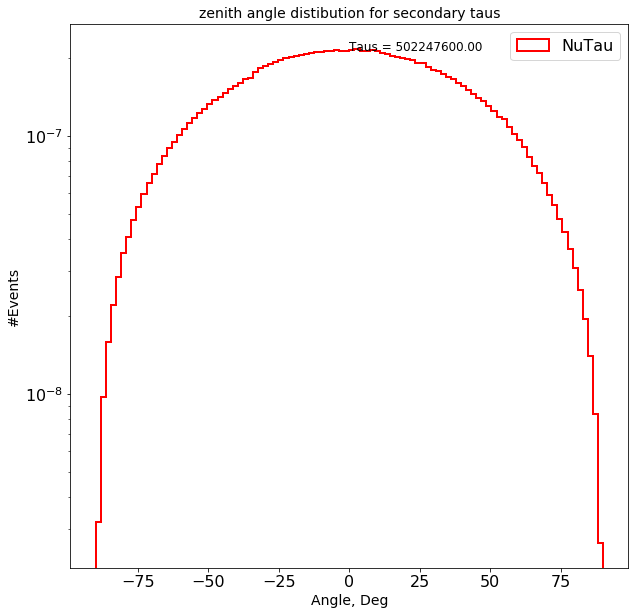

In [172]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("zenith angle distibution for secondary taus", fontsize = 14)
ax.text(0.5,0.95,'Taus = {0:d}'.format(tau_vars.shape[0]), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Angle, Deg', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(tau_vars[:,1], weights = weight, bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  

plt.legend()
plt.show()

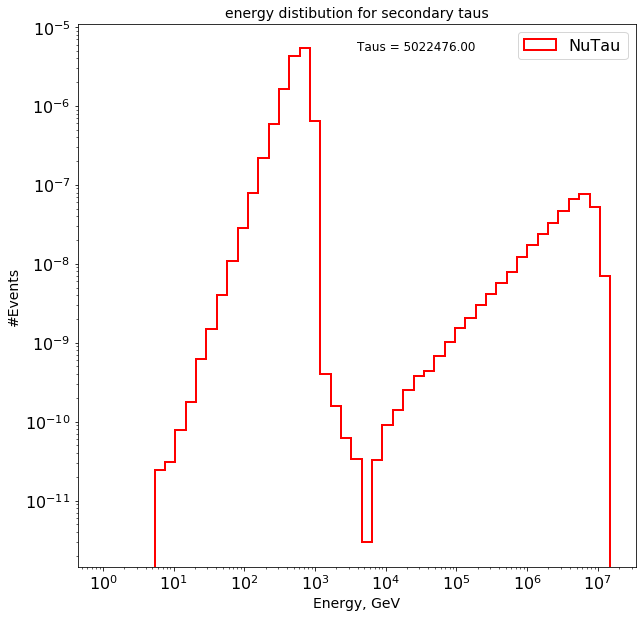

In [180]:
bins=np.logspace(np.log10(1),np.log10(15000000), 50)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title("energy distibution for secondary taus", fontsize = 14)
ax.text(0.5,0.95,'Taus = {0:d}'.format(tau_vars.shape[0]), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(tau_vars[:,0], weights = weight, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  

plt.legend()
plt.show()

In [181]:
mask_30 = (tau_vars[:,1] <=30) 
mask_40 = (tau_vars[:,1] <=40) & (tau_vars[:,1] > 30)
mask_50 = (tau_vars[:,1] <=50) & (tau_vars[:,1] > 40)
mask_60 = (tau_vars[:,1] <=60) & (tau_vars[:,1] > 50)
mask_90 = (tau_vars[:,1] > 60)

In [183]:
tau_vars[:,1][mask_30]

array([-42.59437539, -35.94320889, -65.50560804, ..., -22.40583884,
        15.8882861 , -26.14760088])

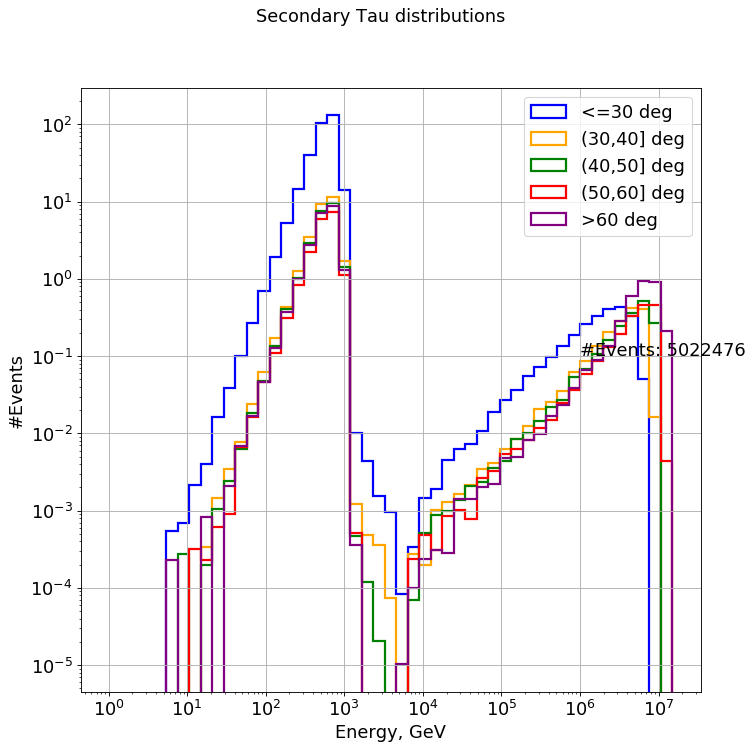

In [185]:
bins=np.logspace(np.log10(1),np.log10(15000000), 50)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Secondary Tau distributions", fontsize = 16)

ax1.text(1000000,0.1,'#Events: {0:d}'.format(tau_vars.shape[0]), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_ylim([1, 10000])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events", fontsize = 16)                                                   
ax1.hist(tau_vars[:,0][mask_30],weights = weight[mask_30]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "<=30 deg")  
ax1.hist(tau_vars[:,0][mask_40],weights = weight[mask_40]*livetime, bins =bins, histtype = 'step',edgecolor ='orange', lw =2, label = "(30,40] deg")  
ax1.hist(tau_vars[:,0][mask_50],weights = weight[mask_50]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "(40,50] deg")  
ax1.hist(tau_vars[:,0][mask_60],weights = weight[mask_60]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "(50,60] deg")  
ax1.hist(tau_vars[:,0][mask_90],weights = weight[mask_90]*livetime, bins =bins, histtype = 'step',edgecolor ='purple', lw =2, label = ">60 deg")  
ax1.legend()
ax1.grid(True)
plt.show()

In [4]:
mctree = np.load('/fastio2/dasha/double_pulse/MCTree_NuTau_AngleCheck.npy', mmap_mode='r')

In [29]:
mt_angles = []
for e in mctree:
    for n,mu in enumerate(e['muons'][0]):
        if not np.sum(mu['tree_id']) ==0:
            if (e['taus'][0][n]['tree_id'] == mu['parent_id']).all():
                #print("aa",mu['direction'])
                #print("bb",e['taus'][0][n]['direction'])
                #print("cc",[mu['direction'][0]-e['taus'][0][n]['direction'][0],mu['direction'][1]-e['taus'][0][n]['direction'][1]])
                
                mt_angles.append([mu['direction'][0]-e['taus'][0][n]['direction'][0],mu['direction'][1]-e['taus'][0][n]['direction'][1]])
    

In [34]:
for p in mt_angles:
    #print(p)
    if not sum(p) == 0:
        print(p)